<a href="https://colab.research.google.com/github/Venchislav/MNIST/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.datasets import mnist

In [40]:
np.random.seed(0)

In [41]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [43]:
# get shapes

print(f'x_train: {x_train.shape}')
print(f'x_test: {x_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

x_train: (60000, 28, 28)
x_test: (10000, 28, 28)
y_train: (60000,)
y_test: (10000,)


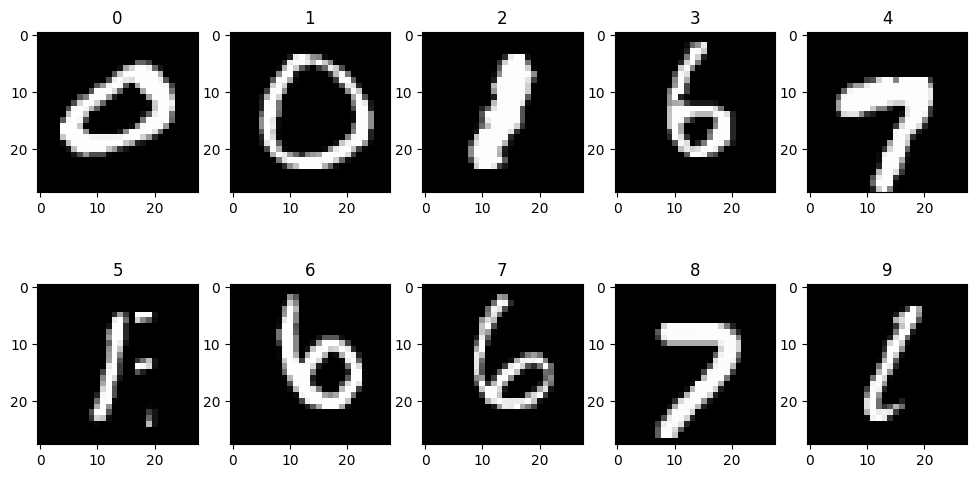

In [57]:
# 10 random digits from x_train
plt.figure(figsize=(12, 6))
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(x_train[np.random.randint(0, len(x_train)-1)], cmap = plt.get_cmap('gray'))
  plt.title(i)

In [60]:
for i in range(10):
  print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [61]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [64]:
# here we get 10x10 matrix
# where position of 1 in row represents a number
# [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
# [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] etc.
# here we get 1 on 5th position (from 0). And if we check y_train[0] before this method
# we will make sure that it's 5

for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


IT'S  ̶m̶o̶r̶b̶i̶n̶  DATA PREPARATION TIME!

In [66]:
x_train /= 255.0
x_test /= 255.0

In [67]:
x_train.shape

(60000, 28, 28)

In [69]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
x_train.shape

(60000, 784)

In [71]:
model = Sequential()
# adding layers
model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train time!

In [72]:
batch_size = 512
epochs = 30
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/30
118/118 [==============================] - 3s 17ms/step - loss: 2.0541 - accuracy: 0.4426
Epoch 2/30
118/118 [==============================] - 1s 11ms/step - loss: 1.0267 - accuracy: 0.6963
Epoch 3/30
118/118 [==============================] - 1s 11ms/step - loss: 0.6843 - accuracy: 0.7893
Epoch 4/30
118/118 [==============================] - 2s 16ms/step - loss: 0.5473 - accuracy: 0.8340
Epoch 5/30
118/118 [==============================] - 1s 11ms/step - loss: 0.4787 - accuracy: 0.8569
Epoch 6/30
118/118 [==============================] - 1s 11ms/step - loss: 0.4372 - accuracy: 0.8691
Epoch 7/30
118/118 [==============================] - 1s 11ms/step - loss: 0.4059 - accuracy: 0.8793
Epoch 8/30
118/118 [==============================] - 1s 11ms/step - loss: 0.3839 - accuracy: 0.8856
Epoch 9/30
118/118 [==============================] - 2s 16ms/step - loss: 0.3698 - accuracy: 0.8905
Epoch 10/30
118/118 [==============================] - 2s 15ms/step - loss: 0.3507 - accura

In [74]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.1598 - accuracy: 0.9519
Test Loss: 0.159827321767807, Test Accuracy: 0.9519000053405762


In [75]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

313/313 [==============================] - 2s 5ms/step
[[5.27304364e-05 5.76549269e-07 5.04458148e-04 ... 9.98658299e-01
  8.52436187e-06 2.54547107e-04]
 [5.40441761e-05 1.40120581e-04 9.98905361e-01 ... 1.02443295e-07
  2.11002789e-05 1.37416273e-10]
 [5.28058877e-07 9.93763089e-01 2.24889978e-03 ... 1.38036860e-03
  1.23644434e-03 5.85293892e-05]
 ...
 [5.18137369e-07 1.24125302e-06 6.38798792e-06 ... 3.08128831e-04
  4.97615372e-04 6.93256501e-03]
 [5.21626043e-06 4.82267933e-04 4.37157155e-07 ... 3.81796639e-07
  6.07992848e-03 2.42841111e-06]
 [1.09401204e-04 8.32619804e-08 7.17887830e-04 ... 2.81881496e-09
  3.29372074e-06 1.03460600e-08]]
[7 2 1 ... 4 5 6]


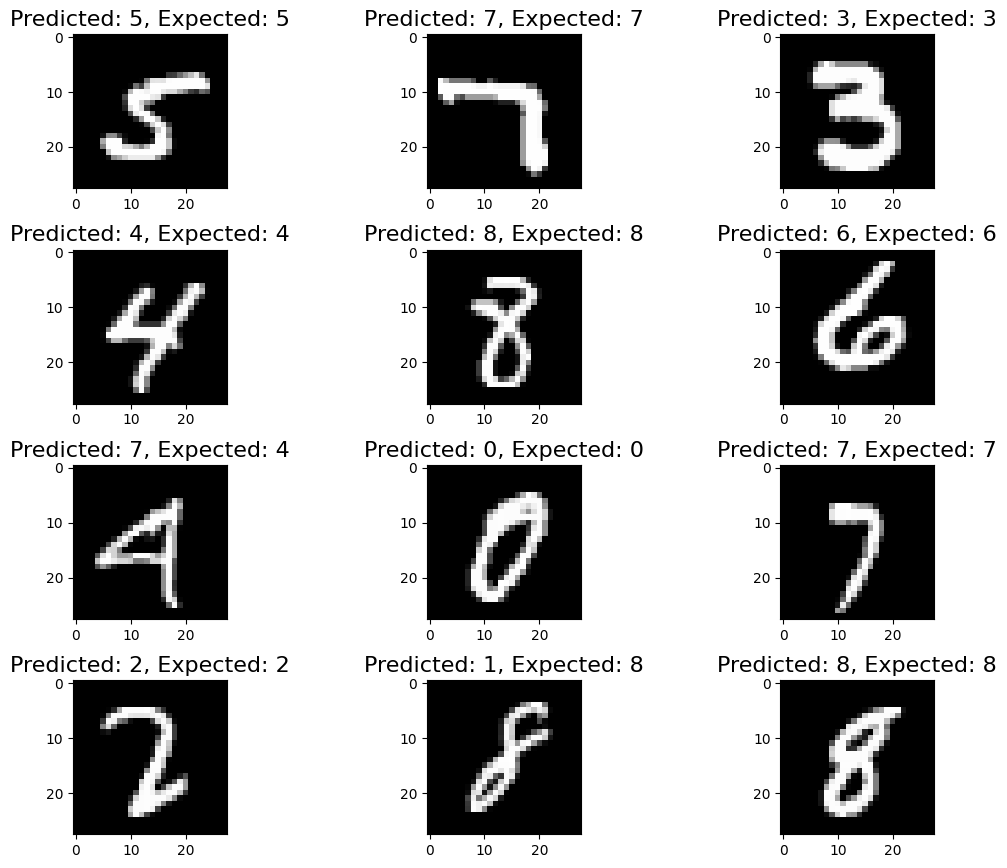

In [89]:
plt.figure(figsize=(12, 10))
for i in range(12):
  random_idx = np.random.choice(len(x_test))
  x_sample = x_test[random_idx]
  y_true = np.argmax(y_test, axis=1)
  y_sample_true = y_true[random_idx]
  y_sample_pred_class = y_pred_classes[random_idx]

  plt.subplot(4, 3, i+1)
  plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
  plt.title("Predicted: {}, Expected: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
  plt.imshow(x_sample.reshape(28, 28), cmap='gray')

Errors

In [90]:
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

In [99]:
y_pred_errors_probability = np.max(y_pred_errors, axis=1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-12:]

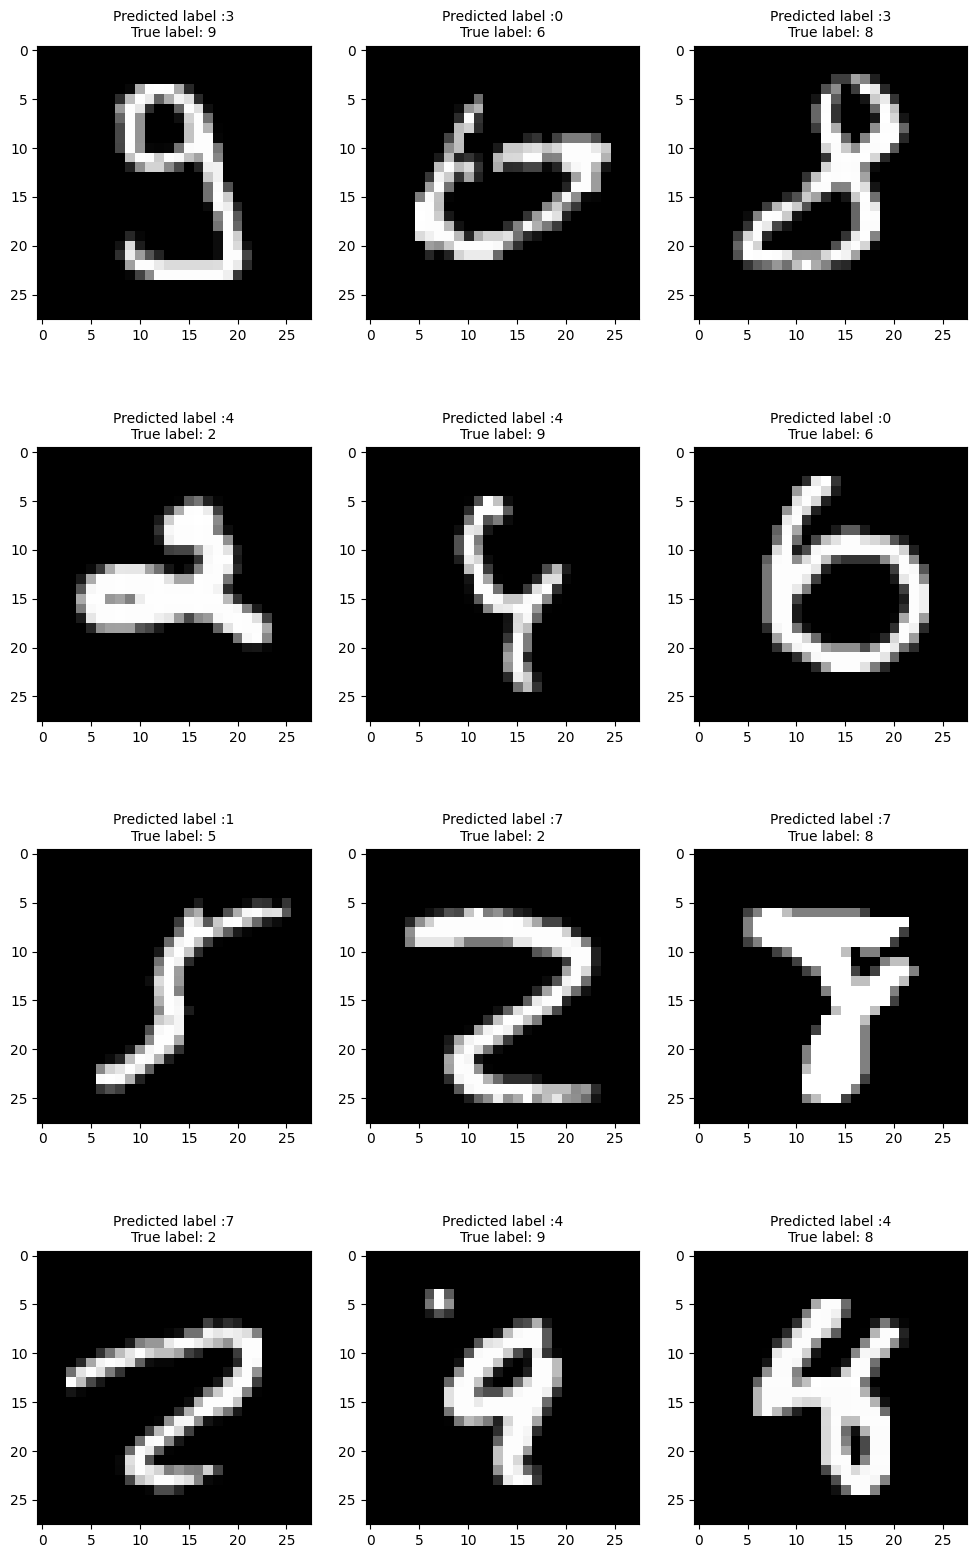

In [108]:
num = len(top_idx_diff_errors)
plt.figure(figsize = (12, 20))
for i in range(0, num):
  idx = top_idx_diff_errors[i]
  sample = x_test_errors[idx].reshape(28,28)
  y_t = y_true_errors[idx]
  y_p = y_pred_classes_errors[idx]
  plt.subplot(4, 3, i+1)
  plt.imshow(sample, cmap='gray')
  plt.title("Predicted label :{}\nTrue label: {}".format(y_p, y_t), fontsize=10)